# Health Insurance Claims Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [2]:
df = pd.read_csv('/Users/arunekambaram/Desktop/Health Insurance Claim Prediction/Health Insurance Data/1651277648862_healthinsurance.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [3]:
df.shape

(15000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [5]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14604.0,39.547521,14.015966,18.0,27.0,40.00,52.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,14044.0,30.266413,6.122950,16.0,25.7,29.40,34.400,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
smoker,15000.0,0.198133,0.398606,0.0,0.0,0.00,0.000,1.0
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
diabetes,15000.0,0.777000,0.416272,0.0,1.0,1.00,1.000,1.0
regular_ex,15000.0,0.224133,0.417024,0.0,0.0,0.00,0.000,1.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


#### Data cleaning

In [7]:
df.isna().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [8]:
from sklearn import preprocessing
columns = ['hereditary_diseases','job_title','city','sex']  # columns names where transform is required
for X in columns:
  exec(f'le_{X} = preprocessing.LabelEncoder()')  #create label encoder with name "le_X", where X is column name
  exec(f'df.{X} = le_{X}.fit_transform(df.{X})')  #execute fit transform for column X with respective lable encoder "le_X", where X is column name
df.head()  # to display transformed results

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


### Checking skewness of data for deciding over imputation of columns having null values

In [9]:
df.skew()

age                    0.005577
sex                    0.040546
weight                 0.286034
bmi                    0.375259
hereditary_diseases   -4.724370
no_of_dependents       0.928935
smoker                 1.514812
city                  -0.063712
bloodpressure         -1.963879
diabetes              -1.331037
regular_ex             1.323201
job_title             -0.198130
claim                  1.497829
dtype: float64

Some features were as a string and it is not possible for a string object to work with an int/float object, and this results into lot of errors in sebsequent code. So we perform Label Encoding, where we convert all the Object-Type features to Integer-Type features.

Here since the data in both the columns, age & bmi have skewness between the range -0.5 to +0.5, so we can say they are fairly symmetrical and hence we proceed with filling null values with mean.¶

In [11]:
updated_df = df
updated_df['age']=updated_df['age'].fillna(updated_df['age'].mean())

updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int64  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int64  
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


In [12]:
updated_df = df
updated_df['bmi']=updated_df['bmi'].fillna(updated_df['bmi'].mean())

updated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int64  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int64  
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


In [13]:
df.duplicated().sum()

1096

In [14]:
df[df.duplicated()]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
605,46.0,0,68,30.266413,8,2,0,41,60,1,0,12,8825.1
608,27.0,0,82,30.266413,8,3,0,57,82,1,1,4,18804.8
898,48.0,0,67,33.100000,0,0,1,15,70,1,0,24,40974.2
919,26.0,1,56,23.700000,8,2,0,36,72,1,0,22,3484.3
970,48.0,0,70,28.900000,8,1,0,35,72,0,0,4,9249.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,46.0,1,46,22.300000,8,0,0,42,72,1,0,0,7147.1
14971,18.0,0,53,27.300000,8,3,1,5,85,1,0,33,18223.5
14987,47.0,1,94,47.500000,8,1,0,68,61,1,0,0,8083.9
14989,44.0,1,90,38.100000,8,1,0,26,76,1,0,16,7152.7


In [15]:
updated_df = updated_df.drop_duplicates()

In [16]:
updated_df.duplicated().sum()

0

### Exploratory Data Analysis

CLAIMS(target) Distribution


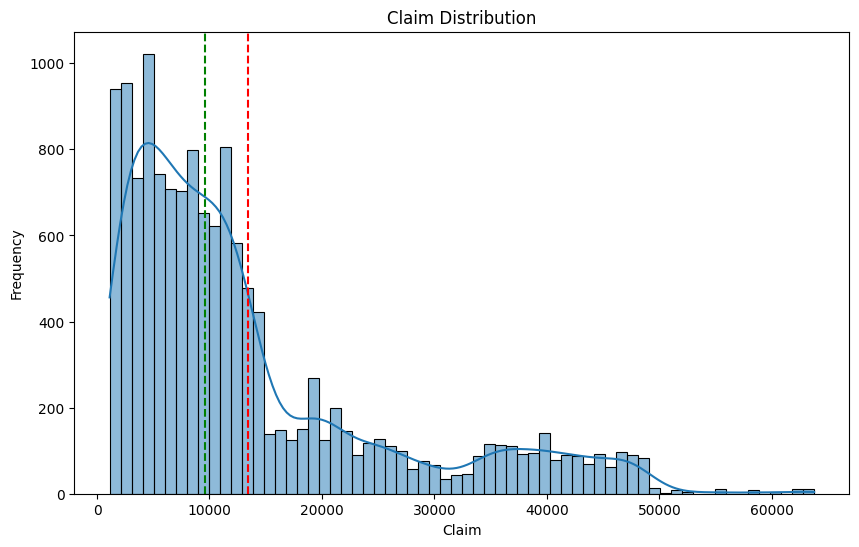

Skewness: 1.489221351406612
Mean: 13431.813744246261
Median: 9567.0


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(x='claim', data=updated_df, kde=True)
plt.axvline(updated_df.claim.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(updated_df.claim.median(), color='g', linestyle='--', label='Median')
plt.title('Claim Distribution')
plt.xlabel('Claim')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {updated_df["claim"].skew()}')
print(f'Mean: {(updated_df["claim"].mean())}')
print(f'Median: {updated_df["claim"].median()}')


On average, clients have claims of around 'dollar 13,431'. However, there are also clients whose claims exceed dollar 60,000, and these clients are outliers that cause the distribution of the claims column to be right-skewed with a skewness value of 1.48.

#### AGE distribution


Text(0, 0.5, 'Frequency')

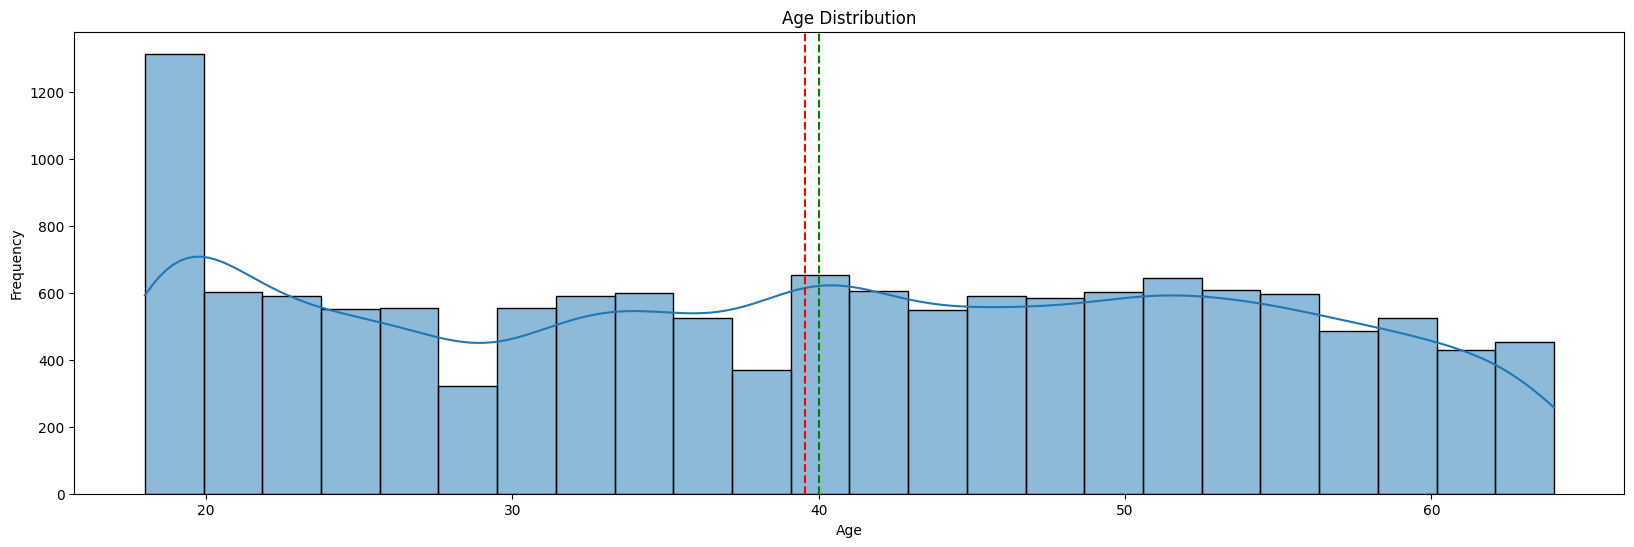

In [18]:
plt.figure(figsize=(20, 6))
sns.histplot(x='age', data=updated_df, kde=True)
plt.axvline(updated_df.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(updated_df.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

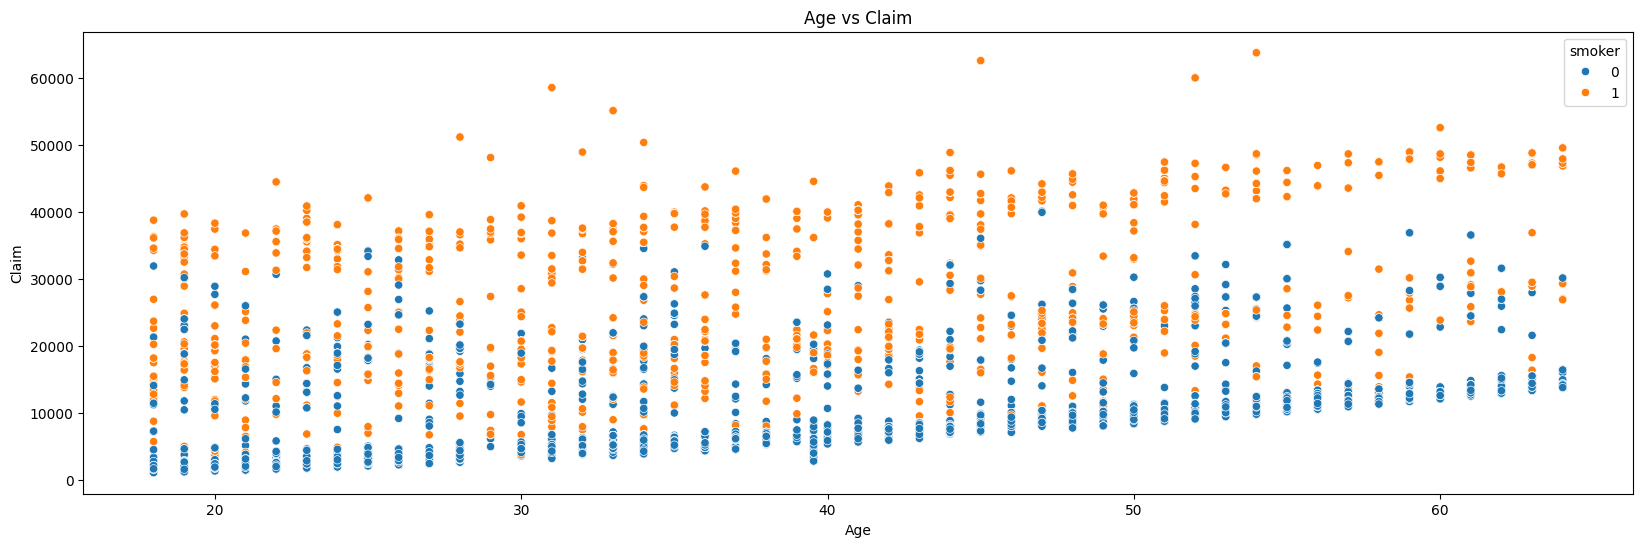

Skewness: 0.006241188212225505
Mean: 40
Median: 40.0
Minimum Age: 18.0
Maximum Age: 64.0


In [19]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='age', y='claim', data=updated_df, hue='smoker')
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.show()
print(f'Skewness: {updated_df["age"].skew()}')
print(f'Mean: {(updated_df["age"].mean()):.0f}')
print(f'Median: {updated_df["age"].median()}')
print(f'Minimum Age: {updated_df["age"].min()}')
print(f'Maximum Age: {updated_df["age"].max()}')

The distribution of the age column is classified as a normal (symmetrical) distribution with a skewness value close to 0, and the mean and median values are close to each other. It is known that the average age of the clients is around 40 years, with the youngest being 18 years old and the oldest being 64 years old. Looking at the scatter plot, it can be determined that the age column has a positive correlation with the claims column, meaning that as the client's age increases, their claims also tend to increase. It is also evident that the claims for smokers are significantly higher than those for non-smokers.¶


#### GENDER distribution


Text(0, 0.5, 'Count')

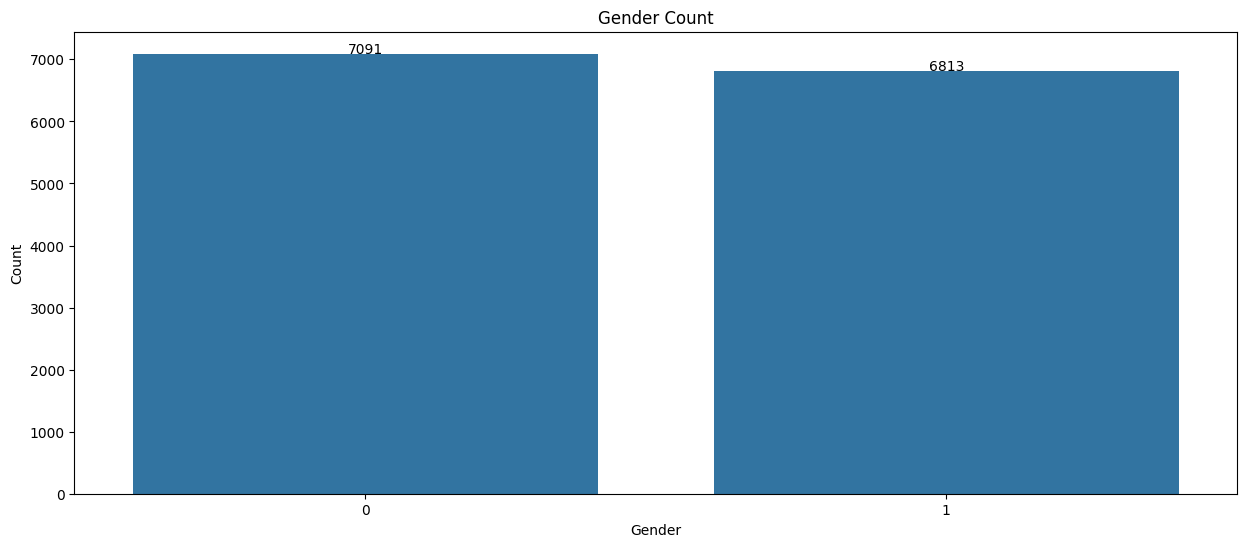

In [20]:
plt.figure(figsize=(15, 6))
fig = sns.countplot(x='sex', data=updated_df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

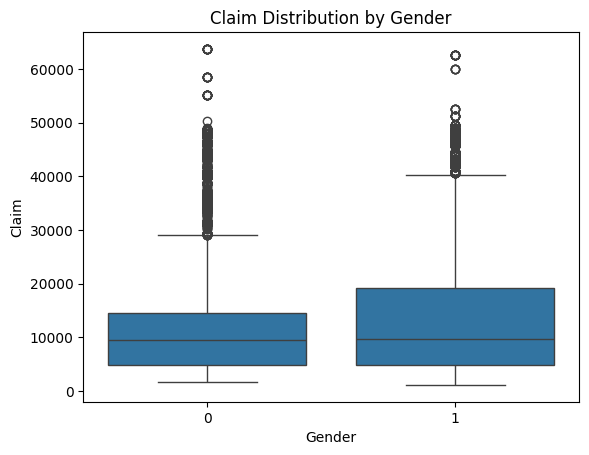

In [21]:
sns.boxplot(x='sex', y='claim', data=updated_df)
plt.title('Claim Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim')
plt.show()

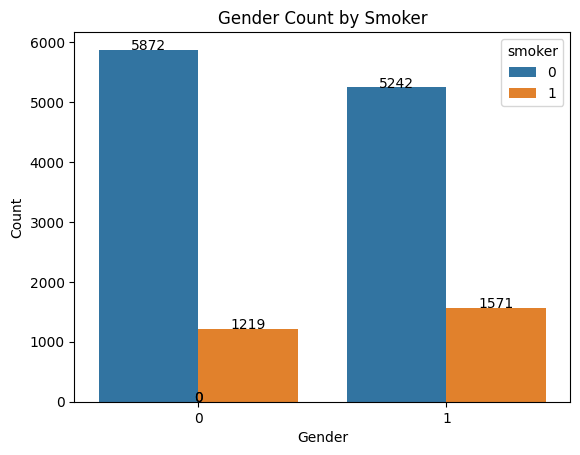

In [22]:
fig = sns.countplot(x='sex', data=updated_df, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count by Smoker')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [23]:
round(updated_df.groupby('sex').claim.mean(), 0).reset_index()

,sex,claim
0,0,12748.0
1,1,14143.0


The number of female and male clients is not significantly different. There are 6813 male clients and 7091 female clients. However, when looking at the range in the claim cost box plot, there is a noticeable difference. The average claims for male clients is around Dollar 14,143, while for female clients, it is around dollar 12748. This difference could possibly be due to a higher proportion of male clients being smokers compared to female clients.

#### BMI distribution

Text(0, 0.5, 'Frequency')

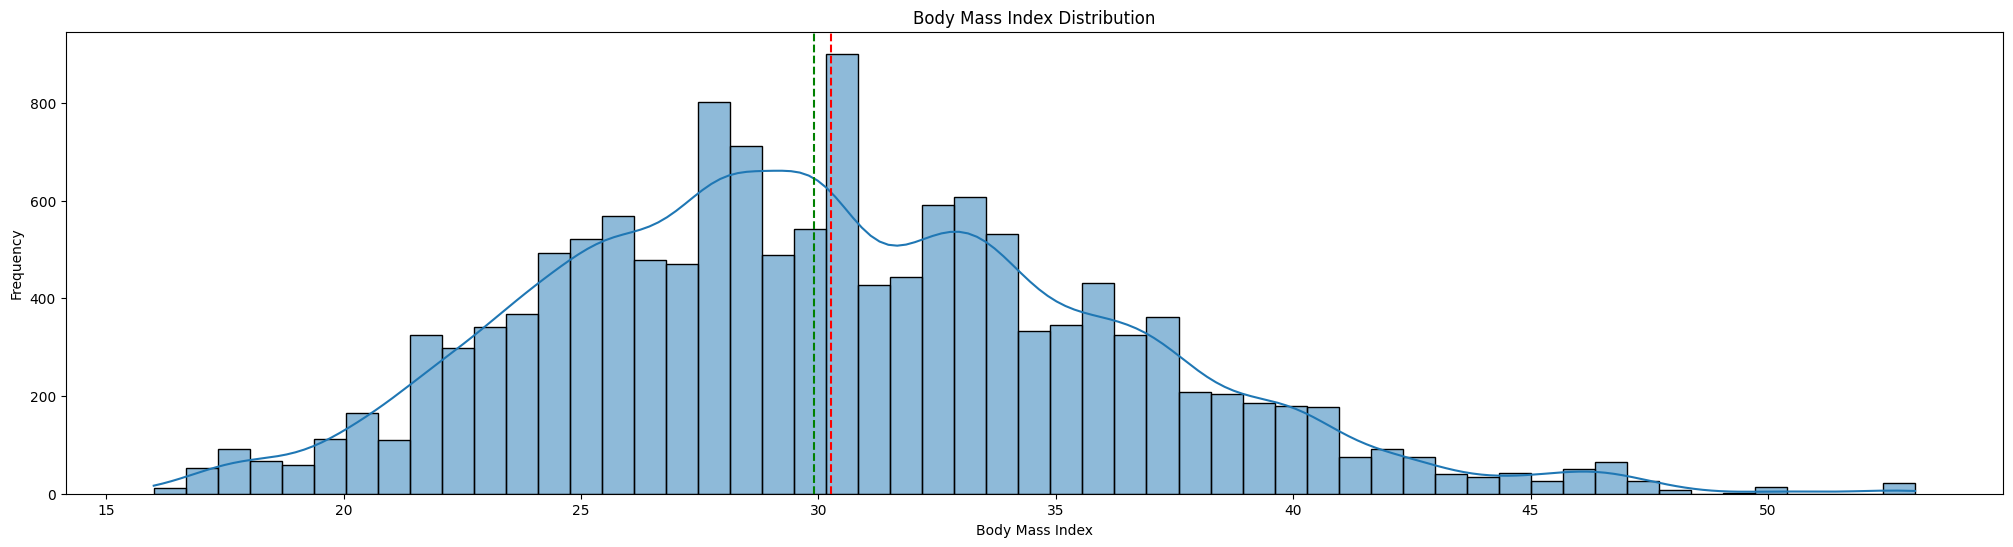

In [24]:
plt.figure(figsize=(25, 6))
sns.histplot(x='bmi', data=updated_df, kde=True)
plt.axvline(updated_df.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(updated_df.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')

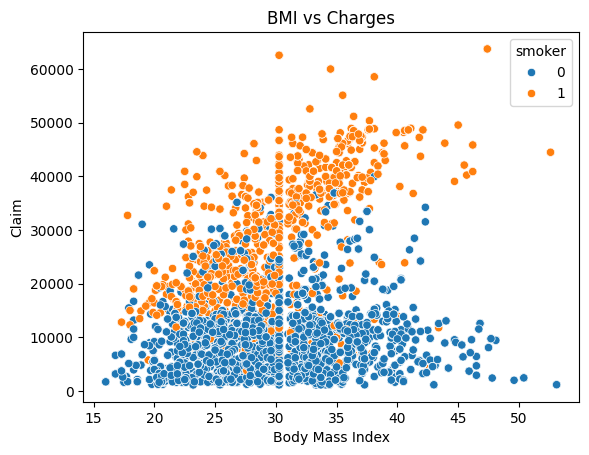

Skewness: 0.390556118762522
Mean: 30.273024873802015
Median: 29.9


In [25]:
sns.scatterplot(x='bmi', y='claim', data=updated_df, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Claim')
plt.show()
print(f'Skewness: {updated_df["bmi"].skew()}')
print(f'Mean: {(updated_df["bmi"].mean())}')
print(f'Median: {updated_df["bmi"].median()}')

On average, clients have a BMI (Body Mass Index) of approx 30 kg/m2. The BMI follows a normal distribution with a bell-shaped curve. There are very few outliers in this column, so it is possible that the outliers in the BMI column will be left as they are. Looking at the scatter plot, the BMI parameter shows a weak positive correlation with the charges column. This means that if a customer is a non-smoker, the increase in claims is not significantly high based on their BMI. However, if a client is a smoker, the higher their body mass index, the higher their claims tends to be.

#### Number Of Dependents Distribution


Text(0, 0.5, 'Count')

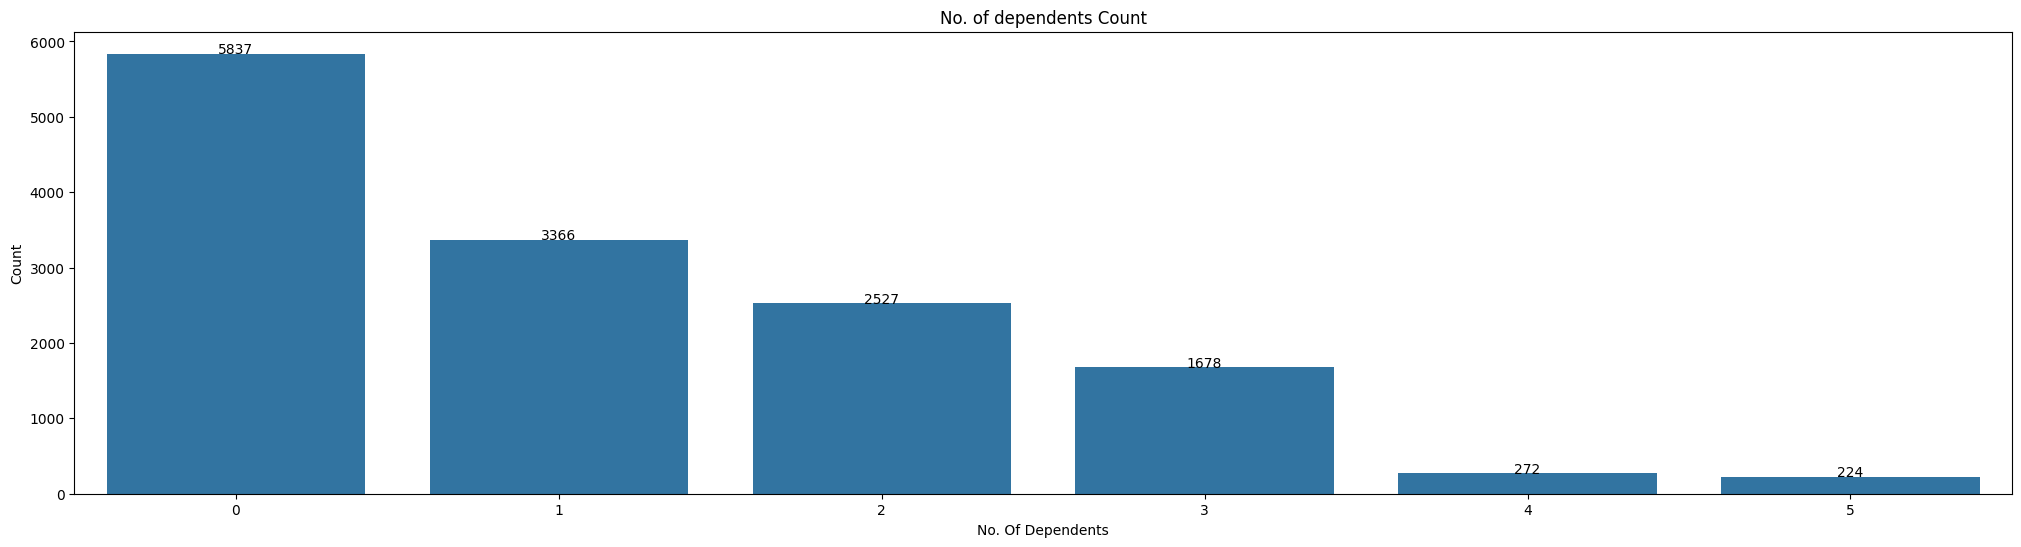

In [26]:
plt.figure(figsize=(25, 6))

fig = sns.countplot(x='no_of_dependents', data=updated_df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('No. of dependents Count')
plt.xlabel('No. Of Dependents')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

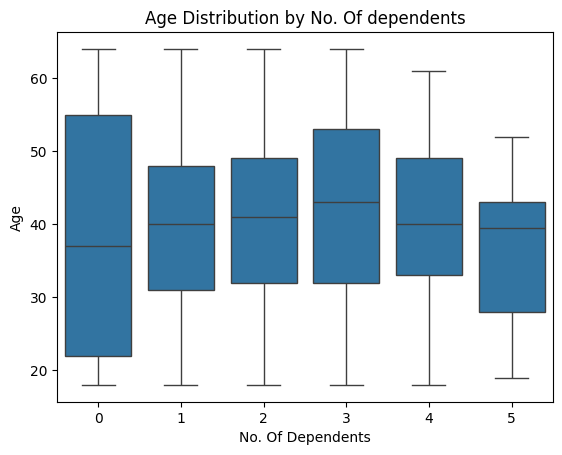

In [27]:
sns.boxplot(x='no_of_dependents', y='age', data=updated_df)
plt.title('Age Distribution by No. Of dependents')
plt.xlabel('No. Of Dependents')
plt.ylabel('Age')

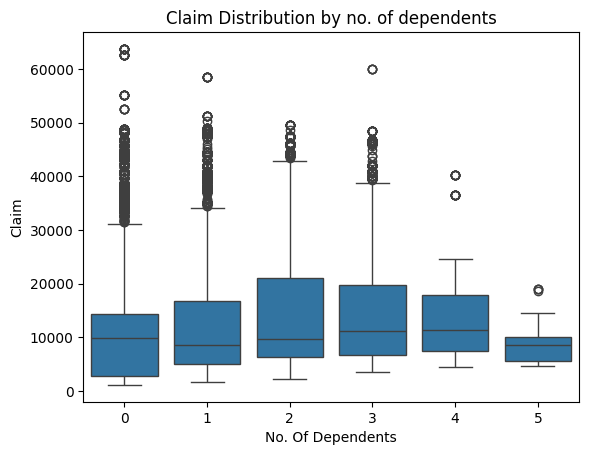

Mean: 1


In [28]:
sns.boxplot(x='no_of_dependents', y='claim', data=updated_df)
plt.title('Claim Distribution by no. of dependents')
plt.xlabel('No. Of Dependents')
plt.ylabel('Claim')
plt.show()
print(f'Mean: {(updated_df["no_of_dependents"].mean()):.0f}')

The average number of dependents for these claim's customer is 1, but there are approximately 5837 clients who do not have any dependents. And based on the box plot between the "no. of dependent" column and the "claims" column, these two columns have a weak positive relationship.

#### SMOKER distribution

Text(0, 0.5, 'Count')

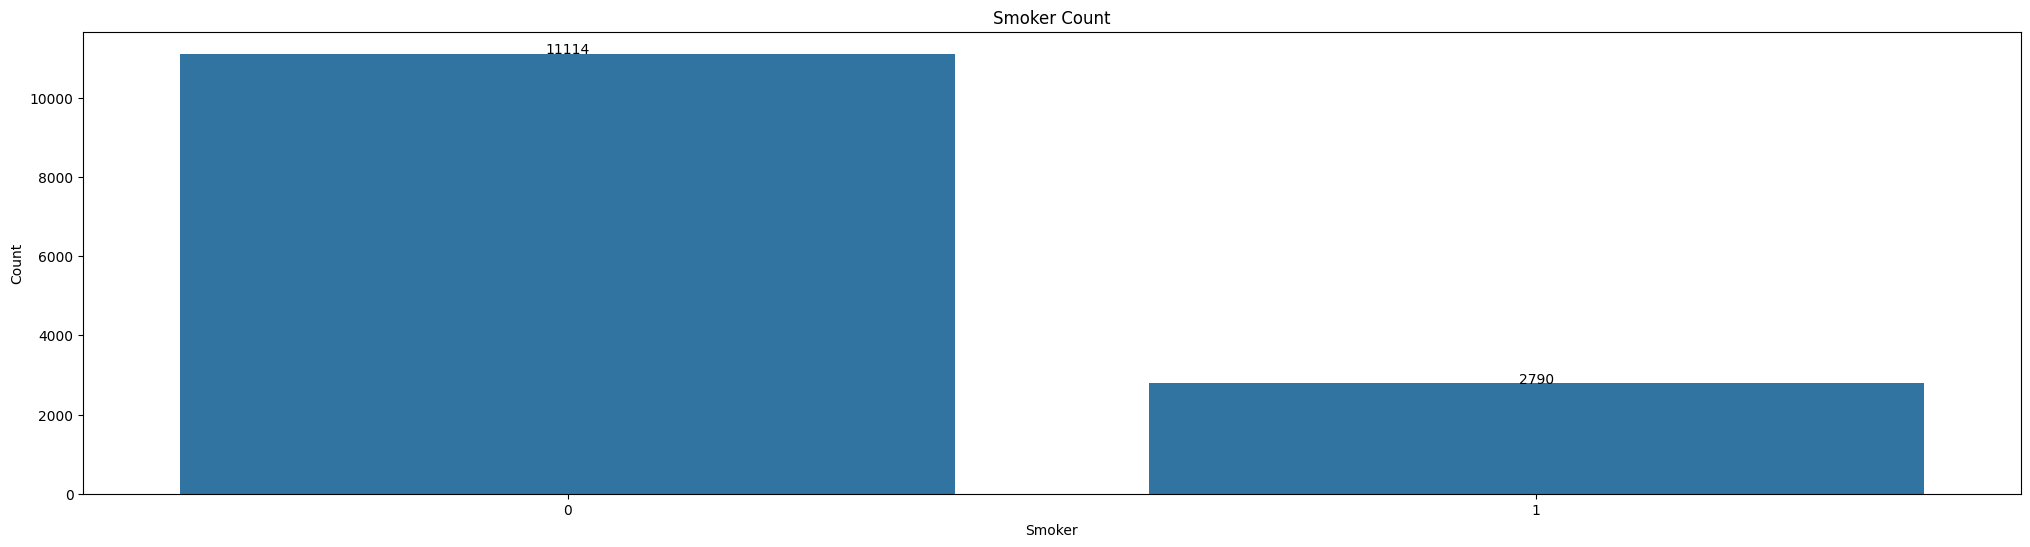

In [29]:
plt.figure(figsize=(25, 6))

fig = sns.countplot(x='smoker', data=updated_df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')

Text(0.5, 1.0, 'Smoker Percentage')

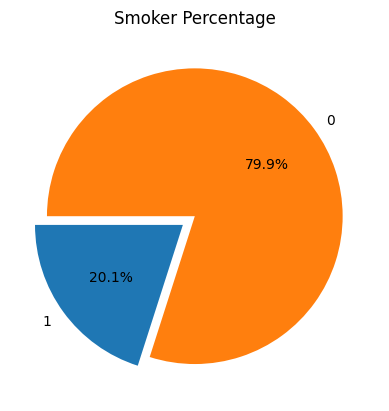

In [30]:
plt.pie(updated_df.smoker.value_counts().reindex([1, 0]), labels=updated_df.smoker.value_counts().reindex([1, 0]).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Smoker Percentage')

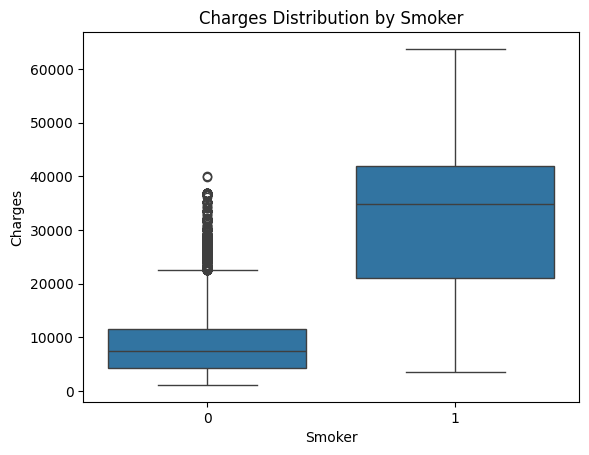

Average Charges for Smokers: $32102
Average Charges for Non-Smokers: $8745


In [31]:
sns.boxplot(x='smoker', y='claim', data=updated_df)
plt.title('Charges Distribution by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
print(f"Average Charges for Smokers: ${(updated_df[updated_df.smoker == 1].claim.mean()):.0f}")
print(f"Average Charges for Non-Smokers: ${(updated_df[updated_df.smoker == 0].claim.mean()):.0f}")

The number of smokers is 11114 clients, which accounts for only about 20% of all claims. However, despite being a small proportion, the cost to be paid by a smoker is around dollar 32,102, significantly higher than non-smokers who pay dollar 8,745.

Text(0, 0.5, 'Count')

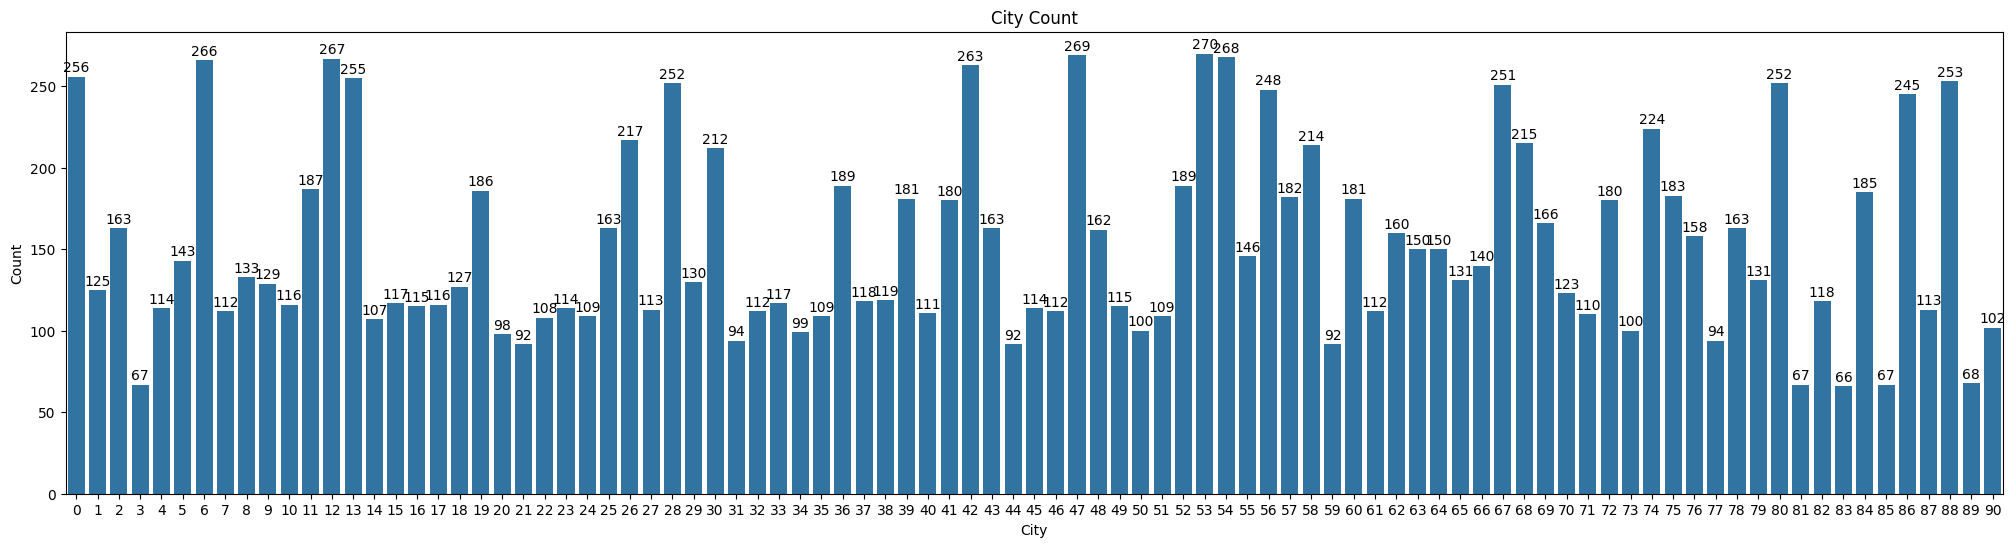

In [32]:
plt.figure(figsize=(25, 6))

fig = sns.countplot(x='city', data=updated_df)

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('City Count')
plt.xlabel('City')
plt.ylabel('Count')

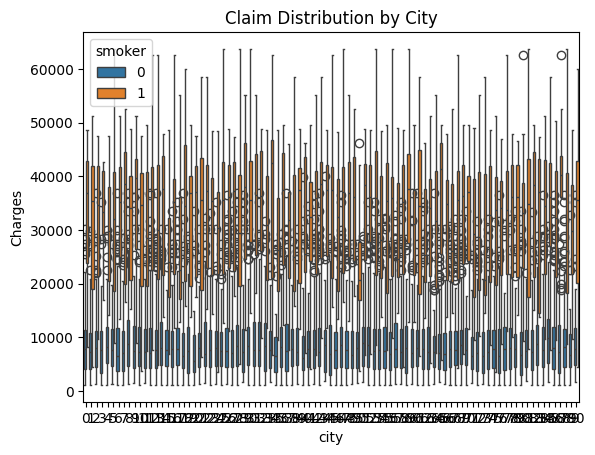

In [33]:
sns.boxplot(x='city', y='claim', data=updated_df, hue='smoker')
plt.title('Claim Distribution by City')
plt.xlabel('city')
plt.ylabel('Charges')
plt.show()

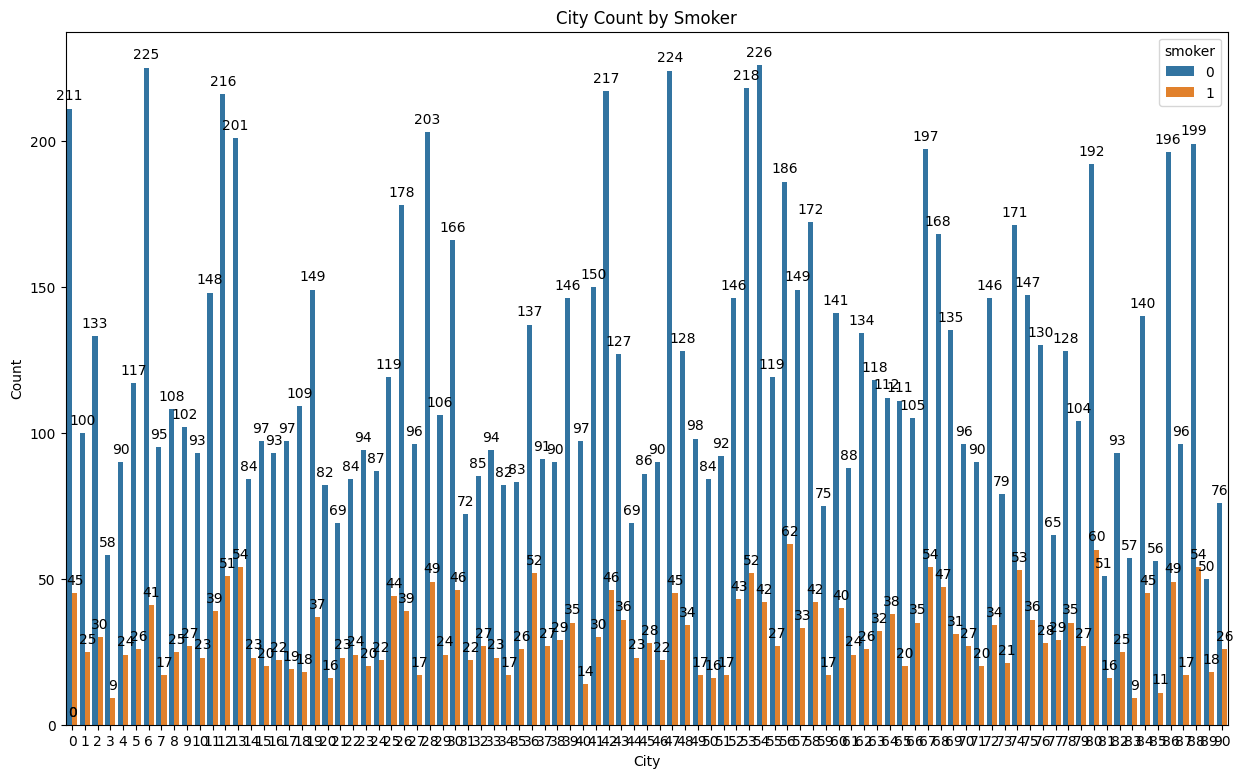

In [34]:
plt.figure(figsize=(15, 9))
fig = sns.countplot(x='city', data=updated_df, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('City Count by Smoker')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

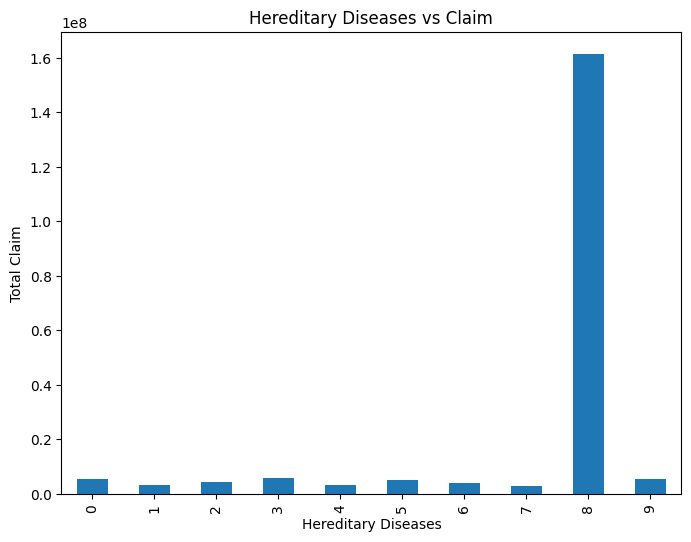

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = df

hereditary_claim = data.groupby('hereditary_diseases')['claim'].sum()

job_claim = data.groupby('job_title')['claim'].sum()

plt.figure(figsize=(8, 6))
hereditary_claim.plot(kind='bar', stacked=True)
plt.xlabel('Hereditary Diseases')
plt.ylabel('Total Claim')
plt.title('Hereditary Diseases vs Claim')
plt.show()

We see people with No Disease have a significantly higher claim as compared to others. So this might be a good feature.

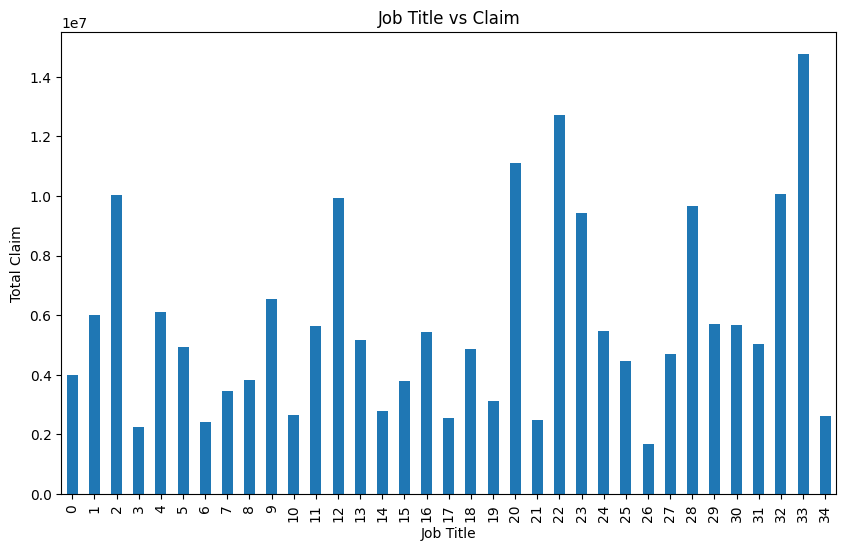

In [37]:
plt.figure(figsize=(10, 6))
job_claim.plot(kind='bar', stacked=True)
plt.xlabel('Job Title')
plt.ylabel('Total Claim')
plt.title('Job Title vs Claim')
plt.show()

The claims across Job Titles are distributed in a similar way, this still could be a good feature for Modelling. But we will leave that on the Feature Selection technique and number of best features.

In [38]:
updated_df.head()


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


#### Correlation Map

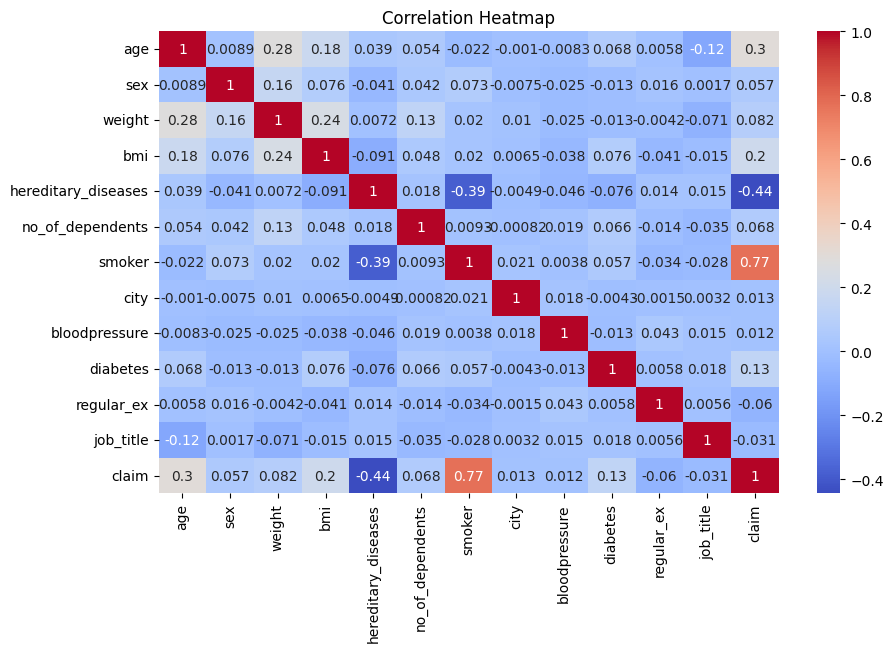

In [39]:
corr_num = updated_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_num, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
updated_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13904 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  13904 non-null  float64
 1   sex                  13904 non-null  int64  
 2   weight               13904 non-null  int64  
 3   bmi                  13904 non-null  float64
 4   hereditary_diseases  13904 non-null  int64  
 5   no_of_dependents     13904 non-null  int64  
 6   smoker               13904 non-null  int64  
 7   city                 13904 non-null  int64  
 8   bloodpressure        13904 non-null  int64  
 9   diabetes             13904 non-null  int64  
 10  regular_ex           13904 non-null  int64  
 11  job_title            13904 non-null  int64  
 12  claim                13904 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


### Feature Selection


We will select top 5 features and then proceed forward with the test train split and training

In [41]:
features = list(updated_df.columns[:12])
print("features:", features, sep="\n")


features:
['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title']


In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

y = updated_df["claim"]
X = updated_df[features]

selector = SelectKBest(f_regression, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
print(updated_df.columns[selector.get_support(indices=True)].tolist())
final_features = updated_df.columns[selector.get_support(indices=True)].tolist()

['age', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'diabetes', 'regular_ex']


In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [46]:
df_train_val, df_test = train_test_split(updated_df, test_size=0.04, random_state=23)
df_train, df_val = train_test_split(df_train_val, test_size=0.1, random_state=23)

In [47]:
print(f'df_train proportion: {len(df_train) / len(updated_df):.2f}')
print(f'df_val proportion: {len(df_val) / len(updated_df):.2f}')
print(f'df_test proportion: {len(df_test) / len(updated_df):.2f}')

df_train proportion: 0.86
df_val proportion: 0.10
df_test proportion: 0.04


### Handling The Outliers

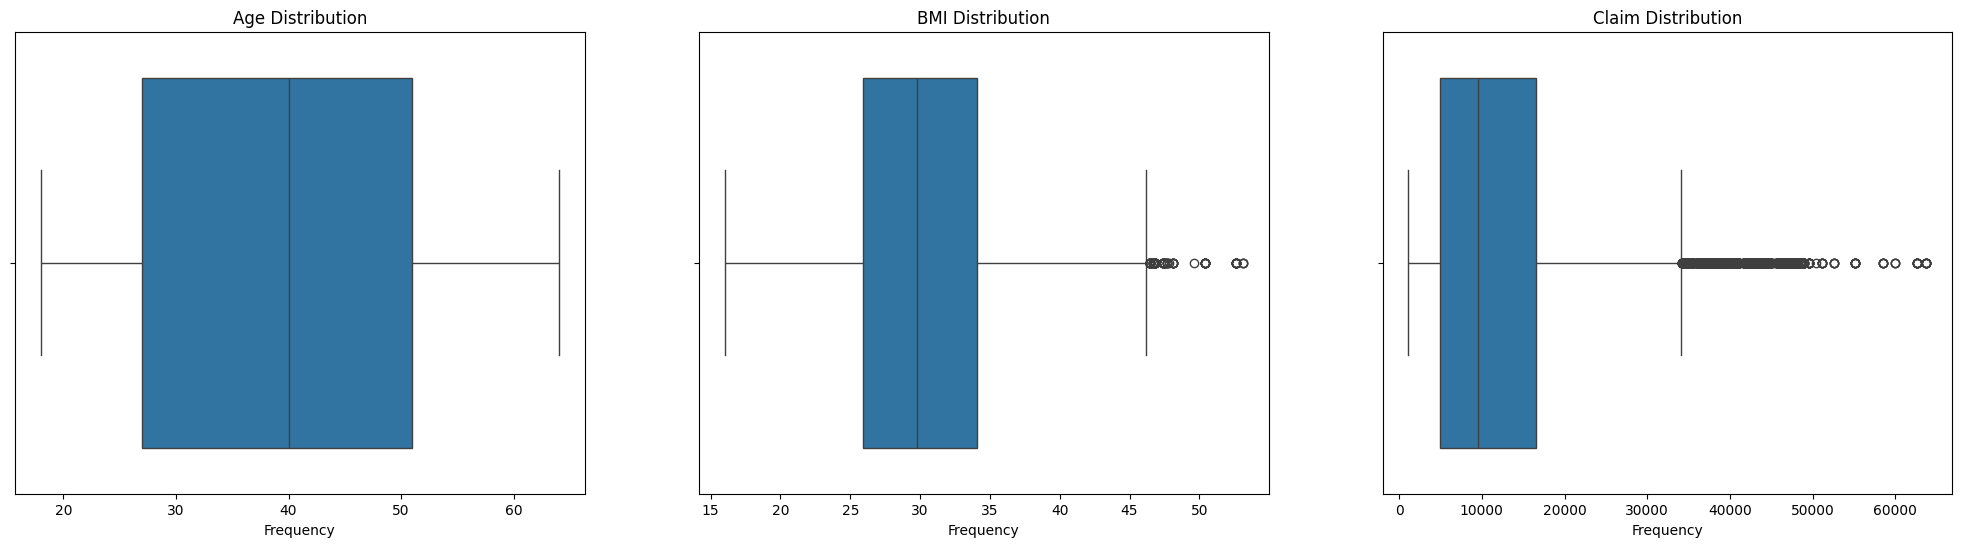

In [49]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='age', data=df_train)
plt.title('Age Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 2)
sns.boxplot(x='bmi', data=df_train)
plt.title('BMI Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 3)
sns.boxplot(x='claim', data=df_train)
plt.title('Claim Distribution')
plt.xlabel('Frequency')
plt.show()


Based on the three box plots of the numeric columns, it appears that there are outliers only in the "claims" column. Since the "claims" column has a skewed distribution, outlier checking will be performed using the IQR method.

In [50]:
# Outlier Detection For Skewed Distribution
def skewed_dis(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)] 

In [51]:
outliers = skewed_dis(df_train, 'claim')
print(f"Outlier percentage: {(len(outliers) / len(df_train) * 100):.1f}%")
outliers

Outlier percentage: 10.8%


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
6197,41.0,1,80,35.800000,8,1,1,42,0,1,0,13,40273.7
6878,40.0,0,58,32.800000,9,2,1,8,70,1,0,9,40003.3
4418,43.0,1,62,38.100000,8,2,1,45,80,1,0,12,42560.4
11699,59.0,0,58,36.800000,8,1,1,13,56,1,0,22,47896.8
10550,43.0,1,72,36.000000,8,3,1,3,74,1,0,28,42124.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,34.0,0,81,30.266413,4,1,1,11,66,1,0,9,43943.9
9875,60.0,1,79,32.800000,8,0,1,7,75,0,0,15,52590.8
14403,36.0,1,90,34.400000,8,0,1,76,90,1,0,1,37742.6
6250,64.0,0,70,33.800000,2,1,1,41,86,1,0,20,47928.0


The table above represents the data of clients who are outliers. Approximately 10% of the clients, or 100 customers, are classified as outliers in the "df_train" dataset. From the "smoker" column, it seems that most of these outliers are smokers. An analysis will be conducted on this outlier data to draw conclusions on whether they should be removed, capped, or left as is.

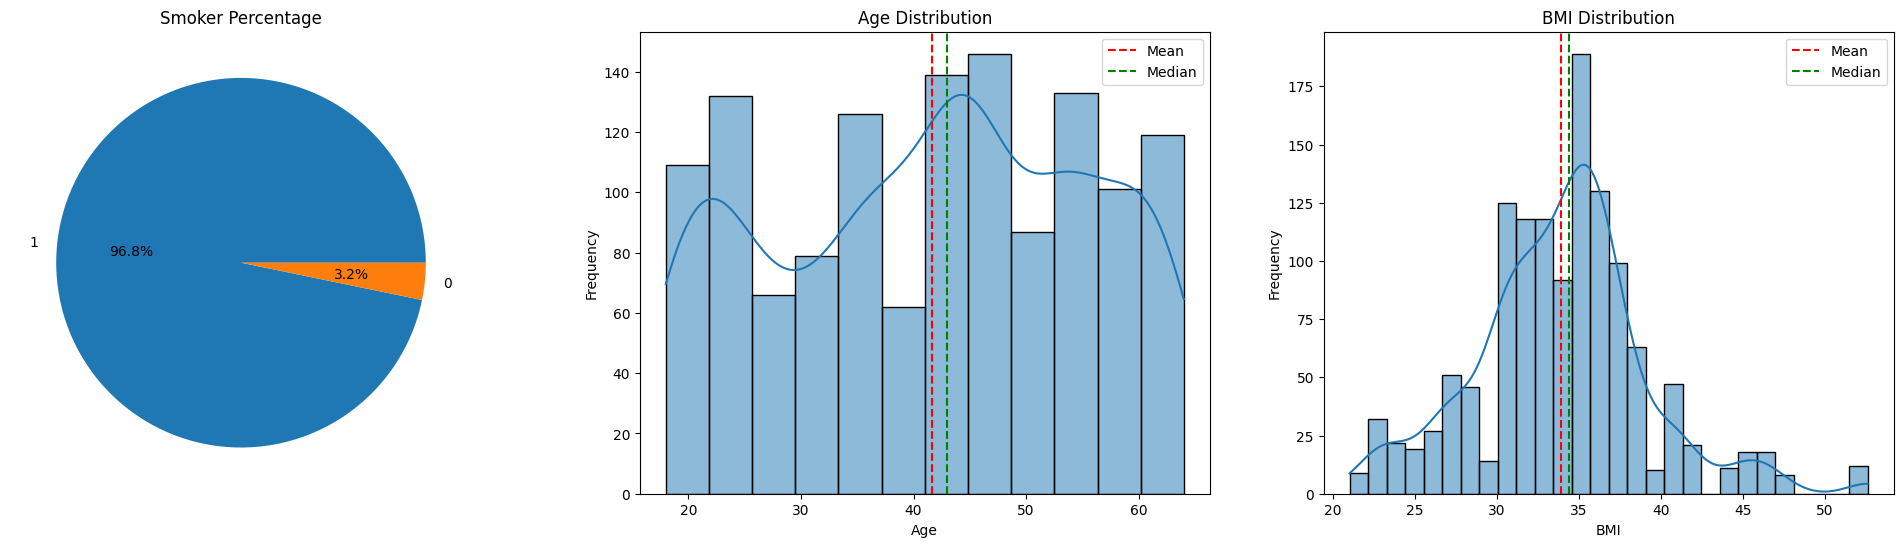

In [52]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.pie(outliers.smoker.value_counts().reindex([1, 0]), labels=outliers.smoker.value_counts().reindex([1, 0]).index, autopct='%1.1f%%')
plt.title('Smoker Percentage')
plt.subplot(1, 3, 2)
sns.histplot(x='age', data=outliers, kde=True)
plt.axvline(outliers.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(outliers.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(x='bmi', data=outliers, kde=True)
plt.axvline(outliers.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(outliers.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [53]:
print(f'Average Claim From Outliers: ${(outliers.claim.mean()):.0f}')
print(f'Average Age From Outliers: {outliers.age.mean():.0f}')
print(f'Average BMI From Outliers: {outliers.bmi.mean():.0f}')

Average Claim From Outliers: $41851
Average Age From Outliers: 42
Average BMI From Outliers: 34


In [54]:
# Training Set
X_train = df_train[final_features]
y_train = df_train.claim

# Validation Set
X_val = df_val[final_features]
y_val = df_val.claim

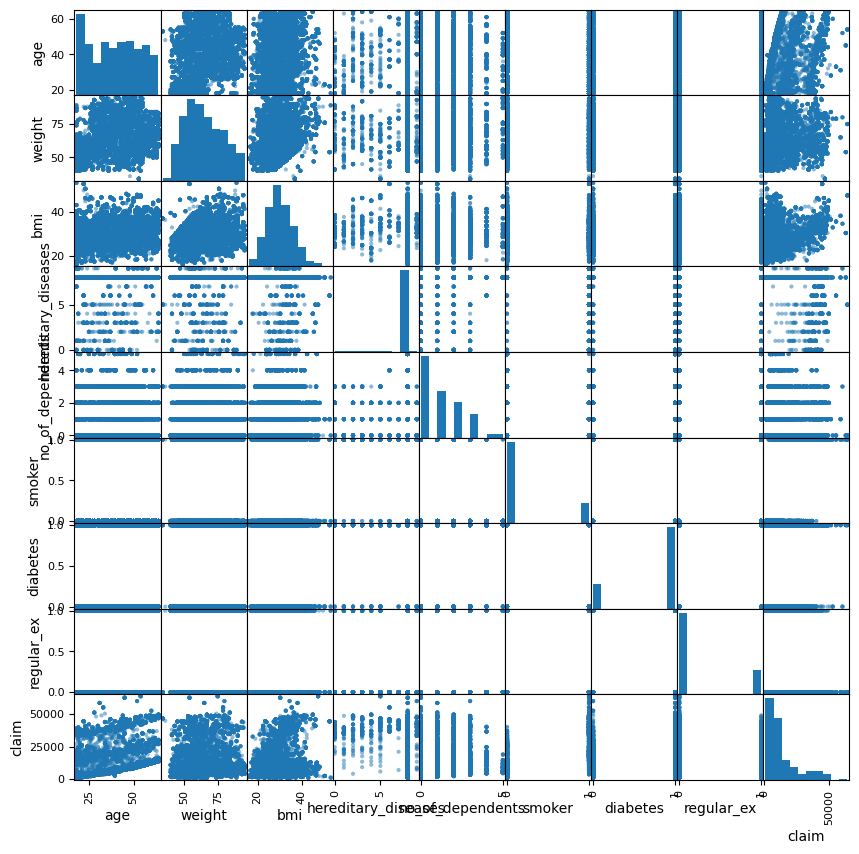

In [55]:
# Selecting the features and target variable
featuresx = final_features
targetx = 'claim'

# Creating a scatter matrix
pd.plotting.scatter_matrix(updated_df[featuresx + [targetx]], figsize=(10, 10))
plt.show()

### Linear Regression


In [56]:
model_1 = LinearRegression()


In [57]:
model_1.fit(X_train, y_train)


LinearRegression()

In [58]:
training_score_1 = model_1.score(X_train, y_train)


In [59]:
y_train_pred_1 = model_1.predict(X_train)
training_mae_1 = mean_absolute_error(y_train, y_train_pred_1)

In [60]:
print("Training Score: ", training_score_1)
print("Training MAE: ", training_mae_1)

Training Score:  0.7380016441192916
Training MAE:  4131.9288457344


In [61]:
model_1_v = LinearRegression()


In [62]:
model_1_v.fit(X_val, y_val)

LinearRegression()

In [63]:
training_score_1_v = model_1_v.score(X_val, y_val)

In [64]:
y_train_pred_1_v = model_1_v.predict(X_val)
training_mae_1_v = mean_absolute_error(y_val, y_train_pred_1_v)

In [65]:
print("Training Score: ", training_score_1_v)
print("Training MAE: ", training_mae_1_v)

Training Score:  0.7519511644648267
Training MAE:  4056.13825804294


In [66]:
# Numeric Features Scaling
num_pipe = Pipeline([('scaling', StandardScaler())])

# Categorical Features Encoding
cat_pipe = Pipeline([('encode', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

In [67]:
poly_lr_pipe = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('poly', PolynomialFeatures()), ('model', LinearRegression())])

In [68]:
poly_params = {'poly__degree': [2,3, 4, 5, 6]}

In [69]:
poly = GridSearchCV(poly_lr_pipe, param_grid=poly_params, cv=2, n_jobs=-1)


#### Model Training


In [70]:
X_train.shape


(12012, 8)

In [71]:
%timeit poly.fit(X_train, y_train)


30.5 s ± 1.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
poly.best_params_


{'poly__degree': 3}

In [73]:
print("The intercept for the model trained above is: ")
interceptx = poly.best_estimator_.named_steps.model.intercept_
print(interceptx)

The intercept for the model trained above is: 
93005904971049.53
